In [1]:
from pathlib import Path
import datetime
import sys
import scipy
import random

%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rc('text', usetex=False)
#Code for using superscripts
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
#Checks to make sure you are in the right folder, if this is wrong reload
import os
print(os.getcwd())

plt.rcParams['font.family'] = 'Helvetica'



C:\Users\jdnor\Documents\PlottingNB


In [5]:
# Choose .csv data file and turn it into dataframe


colnames = ["time" , "val"] #Defines the column tites for a csv without titles

file = pd.read_csv('Profile2496_44.CSV', names = colnames) #,header=[0,1])
df = pd.DataFrame(file)
prof_df = df.iloc[:] # returns whole data set
# in the original code in this cell, this wavelength series takes the first column in the original .csv file. Modify as needed, including renaming.
# assign your measurment names with detail here we will be appending them together later
time = prof_df.iloc[:, 0]
P2496_44 = prof_df.iloc[:, 1]
#This list is the name as a string, the name as a variable, and whether or not you want to include the data in the plot.
datalist = [["2496.44",P2496_44, True]]
#Change true to false for any one you want to expclude from a given plot.


# To see all columns and all rows - you can change None to 10 if you want to see less results; this includes settings info that shows up at the end
pd.set_option("display.max_rows", None, "display.max_columns", None)
# To return dataframe without settings at the end


display(df.head())
display(len(df))

#display(P3333_41.head())
display(time.head())

#Copy this code to import multiple spectra after the first one. 
#Important things to change are the file name, and variable name you want to use for the data
file = pd.read_csv('Profile2496_44.CSV', names = colnames) #,header=[0,1])
df = pd.DataFrame(file)
prof_df = df.iloc[:]
P2496_44 = prof_df.iloc[:, 1]
#This is a list both containing the dataframe you imported as well as a string of the variable name to use in the legend later
datalist.append(['2496_44', P2496_44, False])



,time,val
0,0.423000,0.082763
1,0.847153,0.051250
2,1.271305,0.035975
3,1.695458,0.035952
4,2.119610,0.026517


237

0    0.423000
1    0.847153
2    1.271305
3    1.695458
4    2.119610
Name: time, dtype: float64

In [5]:
# Subtracting Spectra
if False:
    plus = "O2CO_4_100C"
    minus =  "O2CO_5_200C"
    for x in datalist:
        if x[0] == plus:
            plusdata = x[1]
        elif x[0] == minus:
            minusdata = x[1]
    subdata = plusdata - minusdata
    datalist.append([plus + " - " + minus, subdata,True])



In [18]:

    #wn1_df = normalizer.iloc[(normalizer['wavenum']-wn1).abs().argsort()[:1]].index[0]
    #wn2_df = normalizer.iloc[(normalizer['wavenum']-wn1).abs().argsort()[:1]].index[0]
    #norm_diff = normalizer.loc[wn1_df:wn2_df,:].loc[:,'val'].mean()
    #print(norm_diff + x[0])




0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: val, dtype: float64

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: val, dtype: float64

In [6]:
table_for_plot = pd.DataFrame({'Time': time}) 
#Sets wavemnuber for display

for x in datalist:
    if x[2]:
        table_for_plot = table_for_plot.assign(temp = x[1])
        table_for_plot = table_for_plot.rename(columns = {"temp" : x[0]})
        print(x[0] + " : Yes")
    else:
        print(x[0] + " : No")
print(table_for_plot.columns)
#Loops through the list of data to add the data sets into a single dataframe and names it according to the string we set earlier.


baseline = True
if baseline:
 #aligning Data
#Pick a section that has all data flat
    wn1 = 0 # Start in time
    wn2= 100 # End in time
    wn1_df = table_for_plot.iloc[(table_for_plot['Time']-wn1).abs().argsort()[:1]].index[0]
    wn2_df = table_for_plot.iloc[(table_for_plot['Time']-wn2).abs().argsort()[:1]].index[0]  
    table_width = int(table_for_plot.size/len(table_for_plot))
    print(wn2_df)
    for column in table_for_plot.columns:
        if column != "Time":
            norm_diff = table_for_plot.loc[wn1_df:wn2_df,:].loc[:,column].mean()
            table_for_plot[column] = table_for_plot[column] - norm_diff
            print(str(norm_diff) + "yeet")
            print(column + "yeet")
   

2496.44 : Yes
2496_44 : No
Index(['Time', '2496.44'], dtype='object')
235
0.06431048754237288yeet
2496.44yeet


[-0.07, -0.04, 0.0, 0.04, 0.07]
AxesSubplot(0.125521,0.422222;0.823958x0.427778)


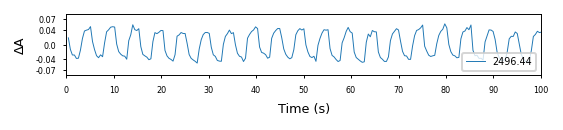

In [9]:

font_size = 0.8
fig = table_for_plot.set_index('Time').plot(figsize=(4, 1), linewidth = 0.6*font_size)


mpl.rcParams['pdf.fonttype'] = 42

fm.findfont('Helvetica')

# Axis labels

fig.set_xlabel("Time (s)", fontsize = 8*font_size)
fig.set_ylabel("\u0394A", fontsize = 8*font_size, name = 'Helvetica')


for axis in ['bottom','left']:
    fig.spines[axis].set_linewidth(0.6*font_size)
    fig.spines[axis].set_position(("axes", 0))
for axis in ['top','right']:
    fig.spines[axis].set_visible(True)
    fig.spines[axis].set_linewidth(0.6*font_size)



#print(table_for_plot.columns[1:])
# And adjust length and tkickness of tick marks
fig.tick_params(width = 0.6*font_size, length = 2*font_size)
fig.tick_params(axis='both', which='minor', labelsize=8)
plt.xticks(fontsize=5*font_size)
plt.yticks(fontsize=5*font_size)



#plt.title('NH' + get_sub("3") + ' DRIFTS CuRu/SiO' + get_sub('2'), fontsize = 120)
#plt.title('NH' + get_sub("3") + ' DRIFTS CuRu/MgOAl' + get_sub('2') + "O" + get_sub('3'), fontsize = 120)
fig.yaxis.set_ticks_position('left')
fig.xaxis.set_ticks_position('bottom')
#Adjusting range and tick frequency of x axis
xhigh = 100
xlow = 0
xpoints = 11
xdigits = 0
xlabels = [round(num, xdigits) for num in np.linspace(xlow, xhigh, xpoints)]
if xdigits <= 0:
    xlabels = [int(num) for num in xlabels]

fig.set_xticks(xlabels)
fig.set_xticklabels(xlabels)
fig.set_xlim(xlow, xhigh)

yhigh = 0.07
ylow = -0.07
ypoints = 5
ydigits = 2

ylabels = [round(num,ydigits) for num in np.linspace(ylow, yhigh, ypoints)]
if ydigits <= 0:
    ylabels = [int(num) for num in ylabels]
print (ylabels)

fig.set_yticks(ylabels)
fig.set_yticklabels(ylabels)
fig.set_ylim(ylow + (ylow - yhigh)/10, yhigh + (yhigh - ylow)/10)

#fig.axes.get_yaxis().set_visible(False)
fig.legend(fontsize = 6*font_size, loc = "lower right")
plt.tight_layout()
print(fig)
#Put the name you want for your figure here, it will be saved as "Fig_'Name'" with both a jpg for quick use and an eps for detailed edits.
fig_name = 'Prof_230630_CuRuAl2O3_NH3run_5s_2496_44'
plt.savefig(Path.cwd() / "Plot_{}.jpg".format(fig_name), bbox_inches="tight", dpi=100)

plt.savefig(Path.cwd() / "Plot_{}.pdf".format(fig_name), format='pdf')
plt.show()
